In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Data

In [2]:
data = pd.read_csv('real-estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
data.shape

(414, 8)

In [4]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Check the effect of transaction date on price

<AxesSubplot:xlabel='X1 transaction date', ylabel='Y house price of unit area'>

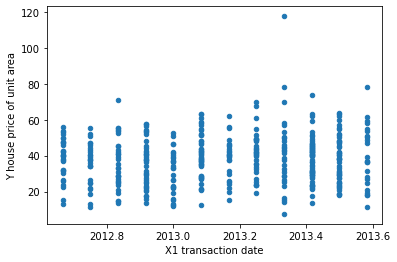

In [5]:
data.plot.scatter("X1 transaction date", "Y house price of unit area")

## Drop No and transaction date column

In [6]:
data.drop('No',axis=1,inplace=True)
data.drop('X1 transaction date',axis=1,inplace=True)

In [7]:
data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Heatmap of data

<AxesSubplot:>

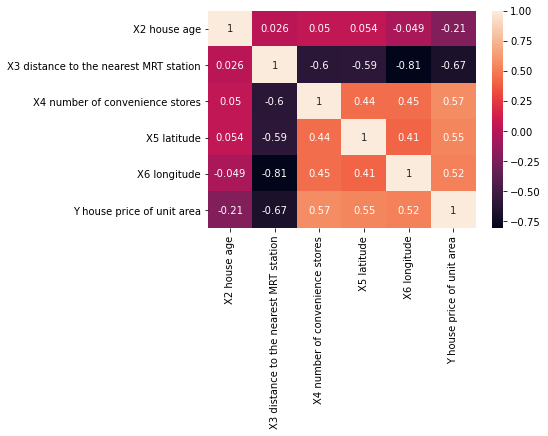

In [8]:
sns.heatmap(data.corr(),annot=True)

## Pair plot to see dependency of each pair of column on each other

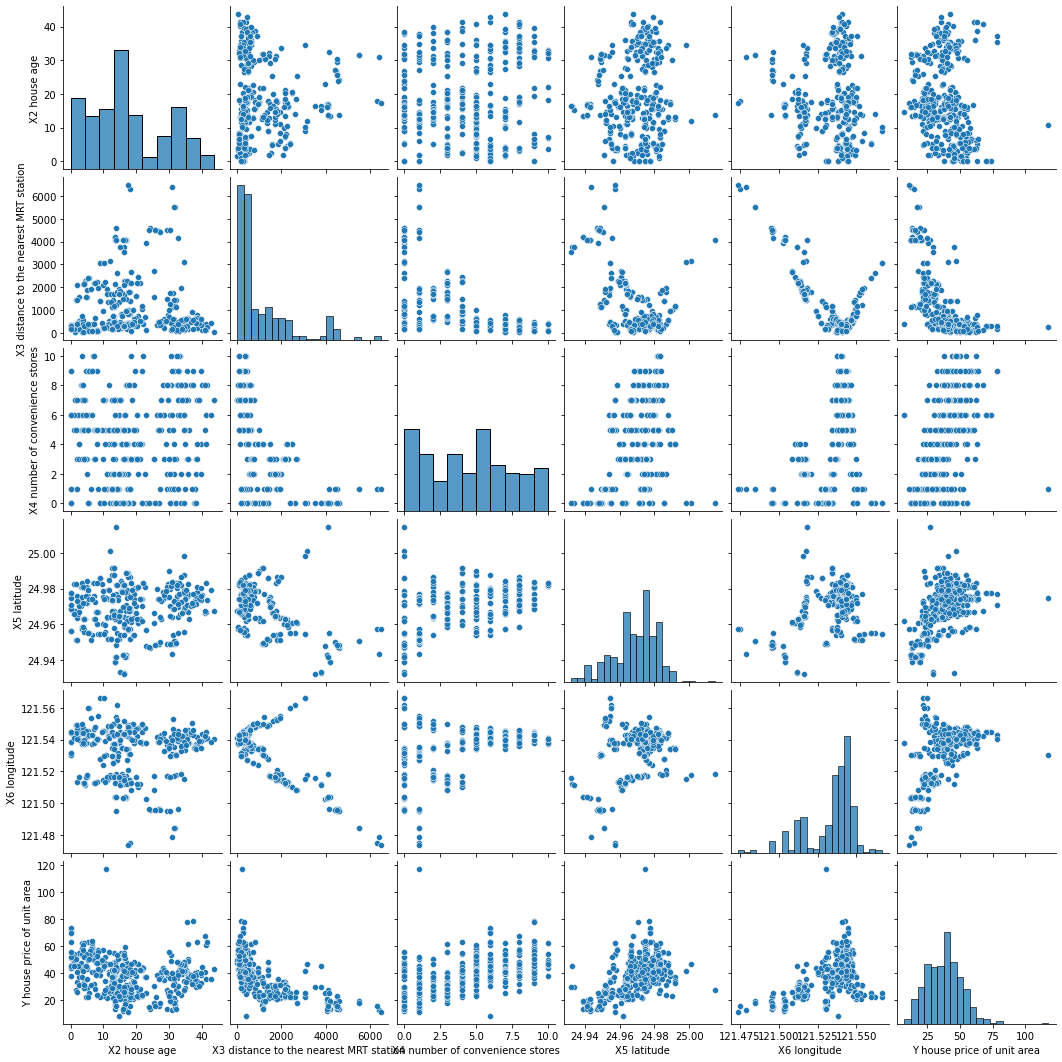

In [9]:
sns.pairplot(data)

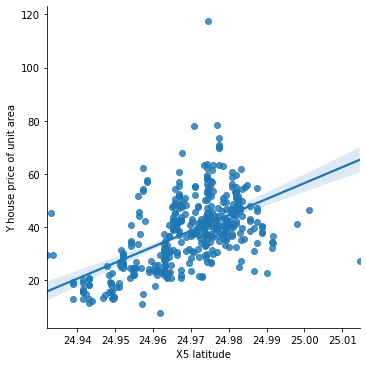

In [10]:
sns.lmplot(x='X5 latitude',y ='Y house price of unit area', data=data)

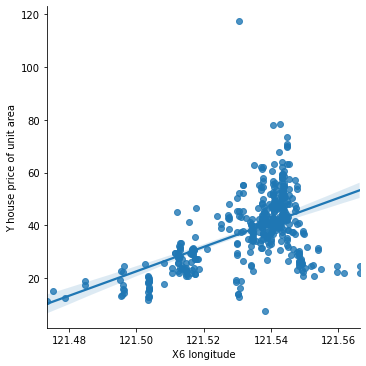

In [11]:
sns.lmplot(x='X6 longitude',y ='Y house price of unit area', data=data)

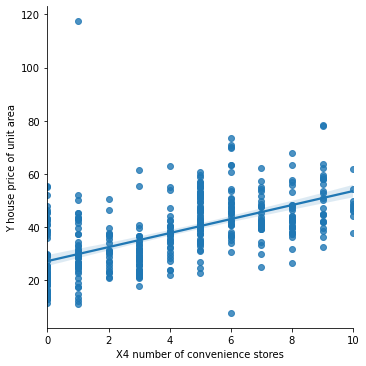

In [12]:
sns.lmplot(x='X4 number of convenience stores',y ='Y house price of unit area', data=data)

## Take data from dataframe and split it to test and train data

In [13]:
y = data["Y house price of unit area"]
X = data[["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores","X5 latitude", "X6 longitude"]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Train the linear regression model

In [15]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-2.87589333e-01 -4.62269977e-03  1.04958764e+00  2.42814162e+02
 -1.47224350e+01]


In [17]:
predictions = lm.predict(X_test)

## Plot the predicted data vs actual data

Text(0, 0.5, 'Predicted Y')

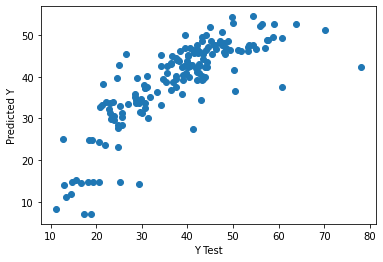

In [18]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Calculate the dfferent errors

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.550201321415762
MSE: 54.375728544924726
RMSE: 7.3739900016832625


## Plot histogram of residuals to check if its normally distributed

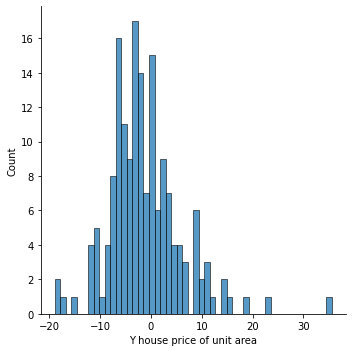

In [20]:
sns.displot((y_test-predictions),bins=50);